In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [131]:
covid = pd.read_csv('2019_nCoV_data.csv')
covid = covid.drop(['Sno'], axis=1)

In [132]:
covid.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1,0,0
1,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14,0,0
2,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6,0,0
3,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1,0,0
4,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0,0,0


In [133]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 7 columns):
Date              1716 non-null object
Province/State    1257 non-null object
Country           1716 non-null object
Last Update       1716 non-null object
Confirmed         1716 non-null int64
Deaths            1716 non-null int64
Recovered         1716 non-null int64
dtypes: int64(3), object(4)
memory usage: 94.0+ KB


In [134]:
covid['Country'].unique().shape

(31,)

In [135]:
covid['Country'].unique()

array(['China', 'US', 'Japan', 'Thailand', 'South Korea',
       'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia',
       'Spain', 'UK', 'Belgium', 'Others', 'Egypt'], dtype=object)

In [136]:
covid['Date_Formated'] = pd.to_datetime(covid['Date']).apply(lambda x: x.date())
covid.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Date_Formated
0,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1,0,0,2020-01-22
1,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14,0,0,2020-01-22
2,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6,0,0,2020-01-22
3,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1,0,0,2020-01-22
4,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0,0,0,2020-01-22


In [137]:
lastest_df = covid[covid['Date_Formated']==pd.Timestamp(2020,2, 17)].reset_index(drop=True)
lastest_df

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Date_Formated
0,02/17/2020 22:00:00,Hubei,Mainland China,2020-02-17T23:13:06,59989,1789,7862,2020-02-17
1,02/17/2020 22:00:00,Guangdong,Mainland China,2020-02-17T12:43:02,1322,4,524,2020-02-17
2,02/17/2020 22:00:00,Henan,Mainland China,2020-02-17T14:53:02,1246,16,509,2020-02-17
3,02/17/2020 22:00:00,Zhejiang,Mainland China,2020-02-17T11:23:06,1171,0,507,2020-02-17
4,02/17/2020 22:00:00,Hunan,Mainland China,2020-02-17T11:43:01,1006,3,498,2020-02-17
...,...,...,...,...,...,...,...,...
70,02/17/2020 22:00:00,"Madison, WI",US,2020-02-05T21:53:02,1,0,0,2020-02-17
71,02/17/2020 22:00:00,"Orange, CA",US,2020-02-01T19:53:03,1,0,0,2020-02-17
72,02/17/2020 22:00:00,"San Antonio, TX",US,2020-02-13T18:53:02,1,0,0,2020-02-17
73,02/17/2020 22:00:00,"Seattle, WA",US,2020-02-09T07:03:04,1,0,1,2020-02-17


In [138]:
cdr = lastest_df.groupby('Country')['Confirmed', 'Deaths', 'Recovered'].sum()
cdr_df = pd.DataFrame(cdr).sort_values(by='Confirmed', ascending=False)
cdr_df

,Confirmed,Deaths,Recovered
Country,,,
Mainland China,72364,1863,12455
Others,454,0,0
Singapore,77,0,24
Japan,66,1,12
Hong Kong,60,1,2
Thailand,35,0,15
South Korea,30,0,10
Taiwan,22,1,2
Malaysia,22,0,7


In [139]:
gcdr_df = pd.DataFrame(cdr_df[['Confirmed', 'Deaths', 'Recovered']].sum(), columns=['total'])
gcdr_df

,total
Confirmed,73260
Deaths,1868
Recovered,12583


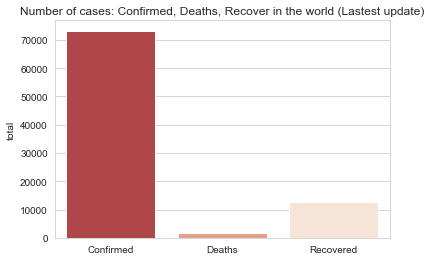

In [141]:
sns.barplot(x=gcdr_df.index, y='total', data=gcdr_df)

plt.title('Number of cases: Confirmed, Deaths, Recover in the world (Lastest update)')
plt.show()

In [142]:
china_others_df = cdr_df.reset_index()
china_others_df['Area'] = china_others_df['Country'].apply(lambda x: 'China' if x == 'Mainland China' else 'Other countries')
china_others_df = china_others_df.groupby('Area')['Confirmed', 'Deaths', 'Recovered'].sum()
china_others_df

,Confirmed,Deaths,Recovered
Area,,,
China,72364,1863,12455
Other countries,896,5,128


In [143]:
others_df = cdr_df.reset_index()
others_df = others_df[others_df['Country'] != 'Mainland China']
others_df['New_Country'] = others_df.apply(lambda x: x.Country if x.Confirmed >= 5 else "(< 5 cases)", axis=1)
others_df

,Country,Confirmed,Deaths,Recovered,New_Country
1,Others,454,0,0,Others
2,Singapore,77,0,24,Singapore
3,Japan,66,1,12,Japan
4,Hong Kong,60,1,2,Hong Kong
5,Thailand,35,0,15,Thailand
6,South Korea,30,0,10,South Korea
7,Taiwan,22,1,2,Taiwan
8,Malaysia,22,0,7,Malaysia
9,Vietnam,16,0,7,Vietnam
10,Germany,16,0,1,Germany


In [144]:
others_df = others_df.groupby('New_Country')['Confirmed', 'Deaths', 'Recovered'].sum()
others_df = others_df.sort_values(by='Confirmed', ascending=False).reset_index()
others_df

,New_Country,Confirmed,Deaths,Recovered
0,Others,454,0,0
1,Singapore,77,0,24
2,Japan,66,1,12
3,Hong Kong,60,1,2
4,Thailand,35,0,15
5,South Korea,30,0,10
6,Malaysia,22,0,7
7,Taiwan,22,1,2
8,(< 5 cases),20,1,13
9,Germany,16,0,1


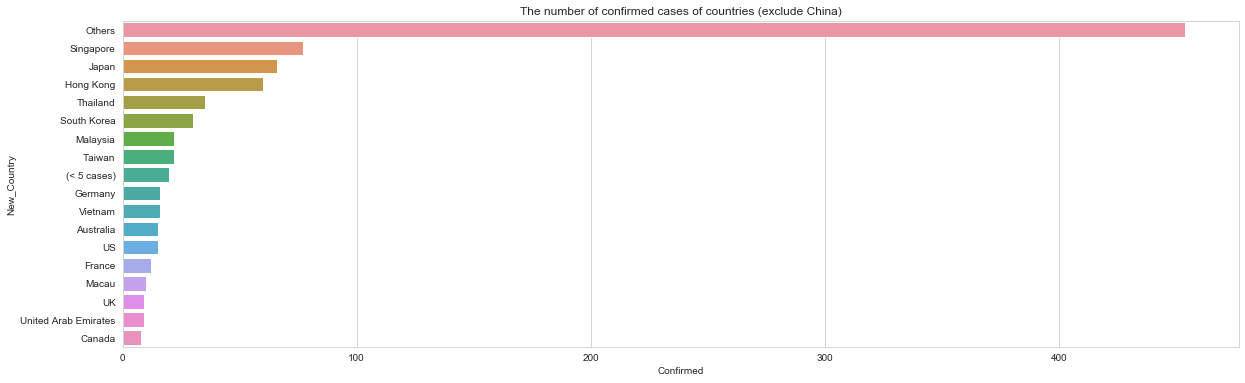

In [145]:
fig, ax0 = plt.subplots()
fig.set_size_inches([20, 6])

sns.set_palette('RdBu')
sns.barplot(y='New_Country', x='Confirmed', data=others_df, ax=ax0)

ax0.set_title('The number of confirmed cases of countries (exclude China)')
plt.show()

In [146]:
changes = covid.groupby('Date_Formated')['Confirmed', 'Deaths', 'Recovered'].sum()
changes_df = pd.DataFrame(changes)
changes_df

,Confirmed,Deaths,Recovered
Date_Formated,,,
2020-01-22,555,0,0
2020-01-23,653,18,30
2020-01-24,941,26,36
2020-01-25,2019,56,49
2020-01-26,2794,80,54
2020-01-27,4473,107,63
2020-01-28,6057,132,110
2020-01-29,7783,170,133
2020-01-30,9776,213,187


In [147]:
changes_df.index

Index([2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 2020-01-26, 2020-01-27,
       2020-01-28, 2020-01-29, 2020-01-30, 2020-01-31, 2020-02-01, 2020-02-02,
       2020-02-03, 2020-02-04, 2020-02-05, 2020-02-06, 2020-02-07, 2020-02-08,
       2020-02-09, 2020-02-10, 2020-02-11, 2020-02-12, 2020-02-13, 2020-02-14,
       2020-02-15, 2020-02-16, 2020-02-17],
      dtype='object', name='Date_Formated')

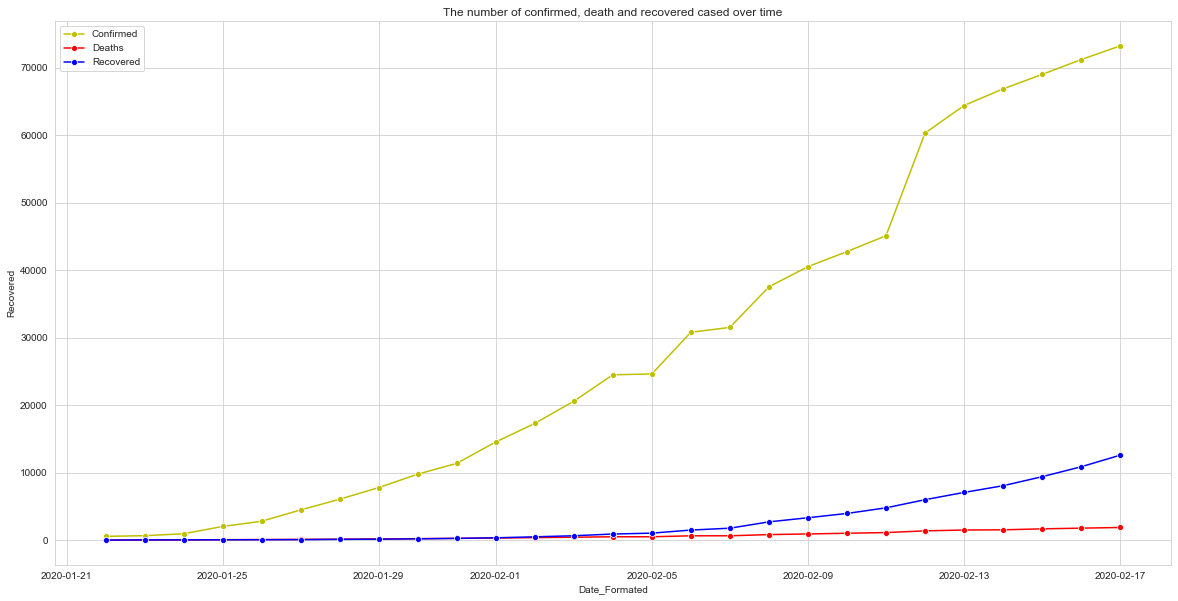

In [148]:
fig, ax = plt.subplots()
fig.set_size_inches([20, 10])

sns.lineplot(x=changes_df.index, y='Confirmed', data=changes_df, marker='o', label='Confirmed', color='y', ax=ax)
sns.lineplot(x=changes_df.index, y='Deaths', data=changes_df, marker='o', label='Deaths', color='r', ax=ax)
sns.lineplot(x=changes_df.index, y='Recovered', data=changes_df, marker='o', label='Recovered', color='b', ax=ax)

ax.set_title('The number of confirmed, death and recovered cased over time')

plt.show()